In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots

colors = ["#b1e7cd","#854442","#000000","#fff4e6","#3c2f2f",
           "#be9b7b ","#512E5F","#45B39D","#AAB7B8 ","#20B2AA",
           "#FF69B4","#00CED1","#FF7F50","#7FFF00","#DA70D6"]

In [2]:
countries = pd.read_csv(r"C:\Data Files\Alex_The_Analyst\World_Population\world_population.csv")

In [3]:
countries.sample(5)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
13,91,AZE,Azerbaijan,Baku,Asia,10358074.0,NaN,9863480.0,9237202.0,8190337.0,7427836.0,6383060.0,5425317.0,86600.0,119.6082,1.0044,0.13
93,4,IDN,Indonesia,Jakarta,Asia,275501339.0,271857970.0,259091970.0,244016173.0,214072421.0,182159874.0,148177096.0,115228394.0,1904569.0,144.6529,1.0064,3.45
178,199,VCT,Saint Vincent and the Grenadines,Kingstown,North America,103948.0,104632.0,106482.0,109308.0,113813.0,112487.0,107480.0,98459.0,389.0,267.2185,0.9963,0.00
91,179,ISL,Iceland,Reykjavík,Europe,372899.0,366669.0,331060.0,318333.0,281462.0,NaN,NaN,204468.0,103000.0,3.6204,1.0069,0.00
231,46,YEM,Yemen,Sanaa,Asia,33696614.0,32284046.0,28516545.0,24743946.0,18628700.0,13375121.0,9204938.0,6843607.0,527968.0,63.8232,1.0217,0.42


In [5]:
countries.shape

(234, 17)

In [7]:
print("The Number of Rows are: ", countries.shape[0])
print("The Number of Rows are: ", countries.shape[1])

The Number of Rows are:  234
The Number of Rows are:  17


In [8]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              230 non-null    float64
 6   2020 Population              233 non-null    float64
 7   2015 Population              230 non-null    float64
 8   2010 Population              227 non-null    float64
 9   2000 Population              227 non-null    float64
 10  1990 Population              229 non-null    float64
 11  1980 Population              229 non-null    float64
 12  1970 Population              230 non-null    float64
 13  Area (km²)          

In [9]:
countries.duplicated().any()

False

In [12]:
pd.DataFrame({'count': countries.shape[0], 
              'nulls': countries.isnull().sum(), 
              'nulls%': countries.isnull().mean() * 100, 
              'cardinality': countries.nunique(),
             })

,count,nulls,nulls%,cardinality
Rank,234,0,0.000000,234
CCA3,234,0,0.000000,234
Country,234,0,0.000000,234
Capital,234,0,0.000000,234
Continent,234,0,0.000000,6
2022 Population,234,4,1.709402,230
2020 Population,234,1,0.427350,233
2015 Population,234,4,1.709402,230
2010 Population,234,7,2.991453,227
2000 Population,234,7,2.991453,227


In [13]:
countries.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.300000e+02,2.330000e+02,2.300000e+02,2.270000e+02,2.270000e+02,2.290000e+02,2.290000e+02,2.300000e+02,2.320000e+02,230.000000,232.000000,234.000000
mean,117.500000,3.463225e+07,3.360071e+07,3.206600e+07,3.027016e+07,2.684050e+07,1.933046e+07,1.628288e+07,1.586650e+07,5.816637e+05,456.811652,1.009553,0.427051
std,67.694165,1.378892e+08,1.358732e+08,1.315071e+08,1.260742e+08,1.133525e+08,8.130962e+07,6.934547e+07,6.835586e+07,1.769133e+06,2083.740364,0.013390,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.064710e+05,3.942950e+05,3.827265e+05,3.294700e+05,2.619280e+05,2.237520e+05,1.458805e+05,2.567250e+03,36.598125,1.001925,0.010000
50%,117.500000,5.762857e+06,5.456681e+06,5.244415e+06,4.889741e+06,4.491202e+06,3.785847e+06,3.135123e+06,2.511718e+06,7.714100e+04,95.346750,1.007900,0.070000
75%,175.750000,2.265372e+07,2.152263e+07,1.973085e+07,1.682585e+07,1.562547e+07,1.188276e+07,9.817257e+06,8.817329e+06,4.146432e+05,236.884000,1.016650,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


In [14]:
countries.describe(include = object)

,CCA3,Country,Capital,Continent
count,234,234,234,234
unique,234,234,234,6
top,AFG,Afghanistan,Kabul,Africa
freq,1,1,1,57


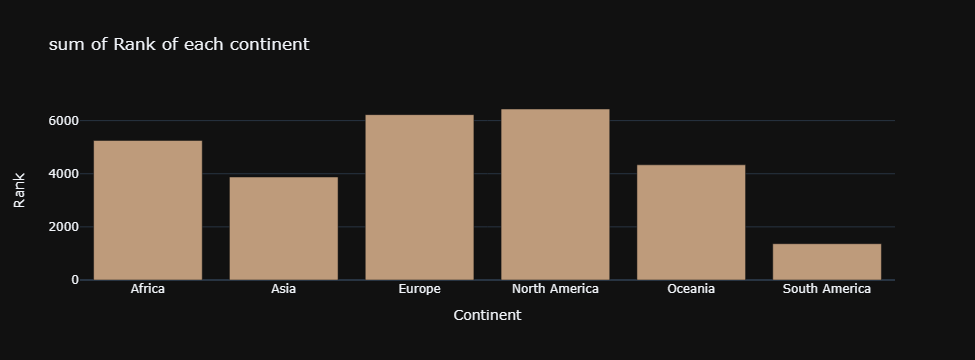

In [22]:
d = countries.groupby(by='Continent').sum()

d = countries.groupby(by = 'Continent').sum()

iplot(px.bar(d, x= d.index, y= 'Rank',
             title = 'sum of Rank of each continent',
             color_discrete_sequence = [colors[5]],
             template='plotly_dark'))

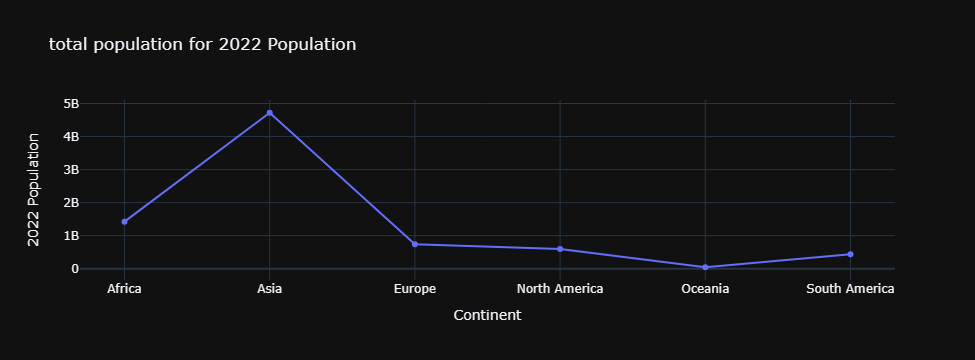

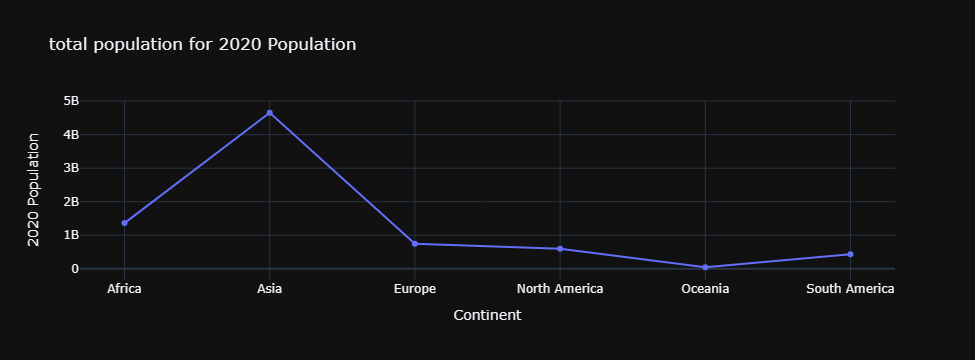

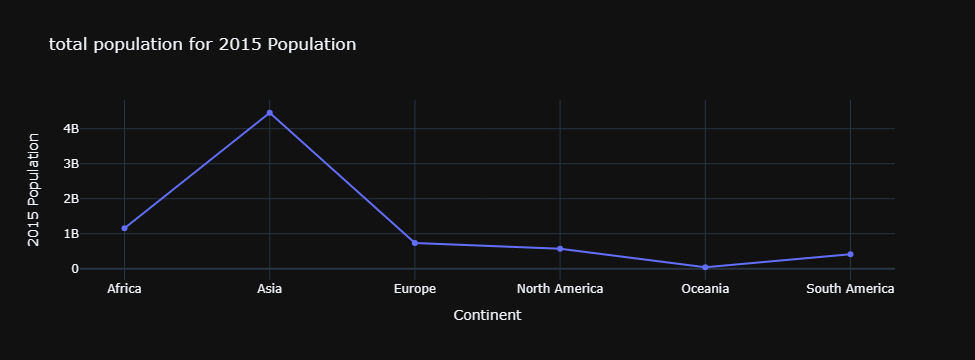

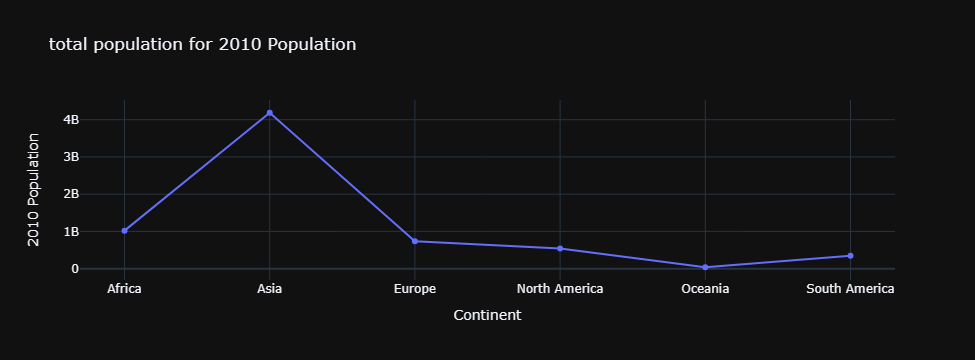

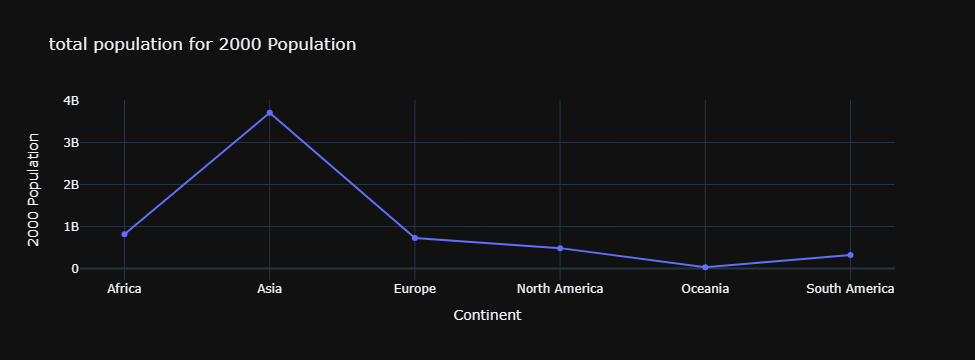

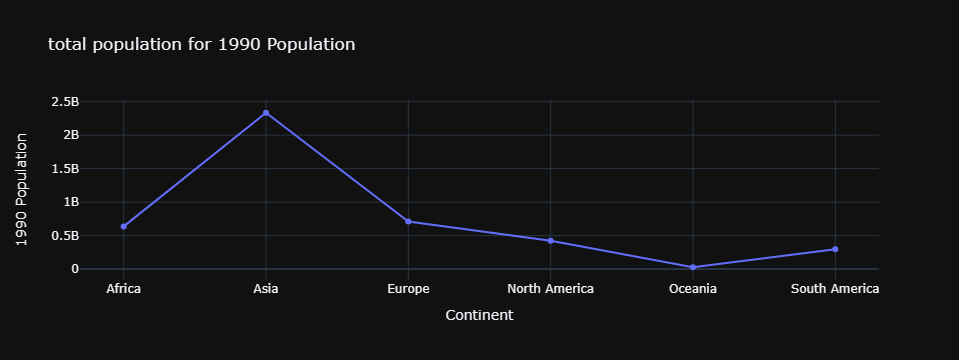

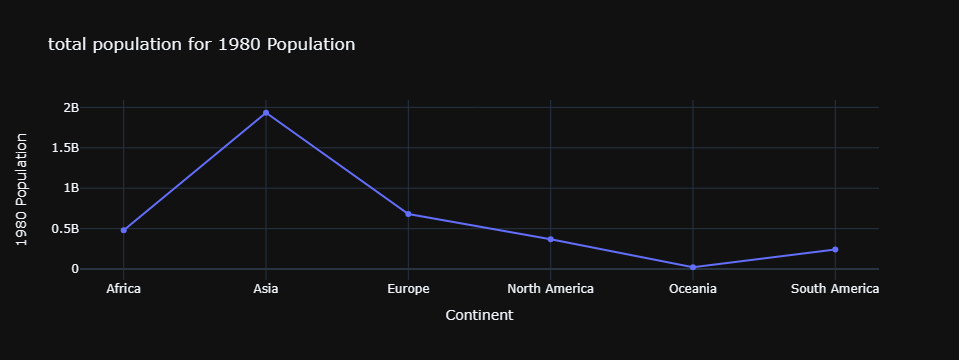

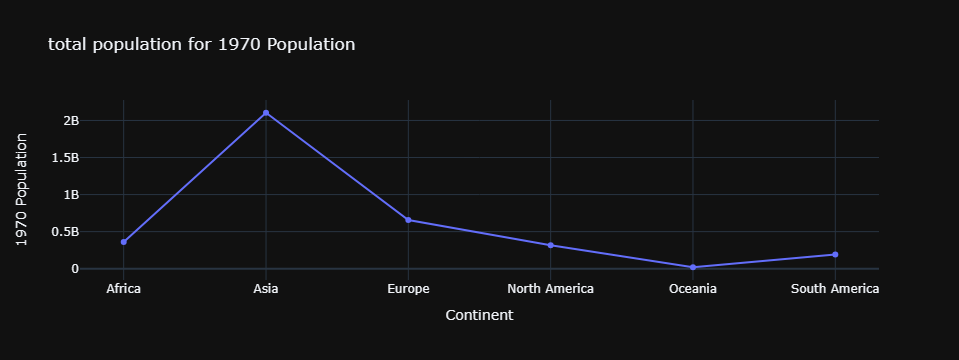

In [18]:
column_to_vis = ['2022 Population','2020 Population','2015 Population','2010 Population','2000 Population','1990 Population','1980 Population','1970 Population']
for year in column_to_vis:
    
    fig = px.line(d, x= d.index, y= year,
                  title=f'total population for {year}',
                  markers=True,
                  template='plotly_dark')
    
    iplot(fig)

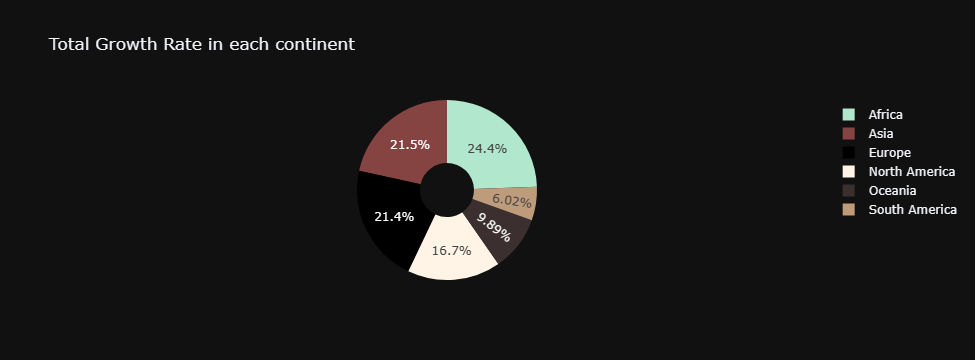

In [19]:
fig = px.pie(d, names= d.index, values='Growth Rate',
             title='Total Growth Rate in each continent',
             color_discrete_sequence = colors,
             hole=0.3,
             template='plotly_dark')

fig.show()

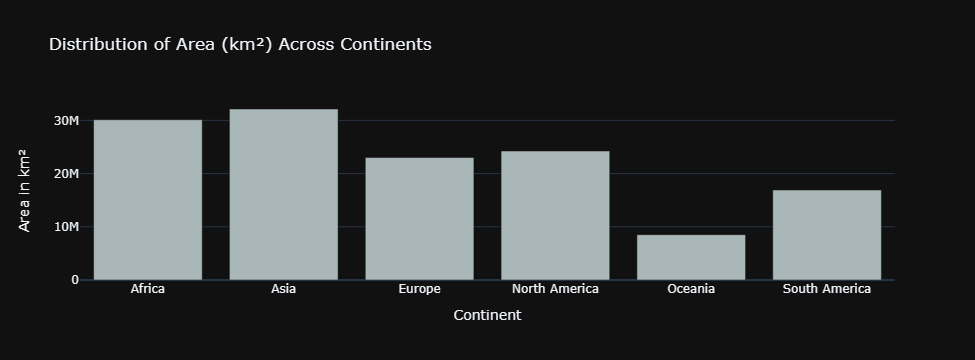

In [21]:
fig = px.bar(d, x= d.index, y='Area (km²)',
             title='Distribution of Area (km²) Across Continents',
             labels={'Area (km²)': 'Area in km²'},
             color_discrete_sequence = [colors[8]],
             template='plotly_dark')

fig.show()

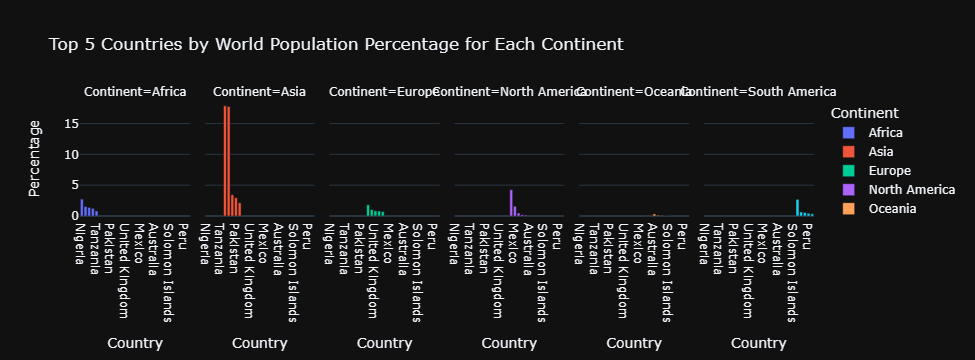

In [30]:
top_countries_per_continent = pd.DataFrame()

for continent, group in countries.groupby('Continent'):
    top_countries = group.nlargest(5, '2022 Population')
    top_countries_per_continent = pd.concat([top_countries_per_continent, top_countries])

fig = px.bar(top_countries_per_continent, x='Country', y='World Population Percentage',
             color='Continent',
             title='Top 5 Countries by World Population Percentage for Each Continent',
             labels={'World Population Percentage': 'Percentage'},
             facet_col='Continent',
             facet_col_wrap=8)  

fig.update_layout(template='plotly_dark')
fig.show()

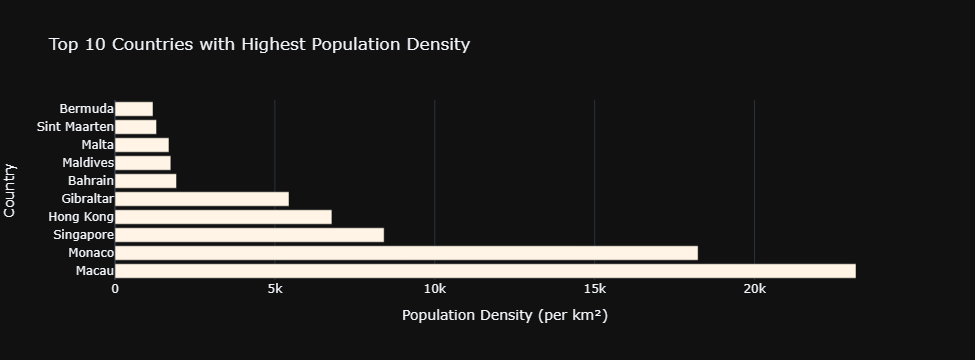

In [36]:
top_density_countries = countries.nlargest(10, 'Density (per km²)')
x = top_density_countries[['Country', 'Density (per km²)']]

fig = px.bar(x, x='Density (per km²)', y='Country',
             orientation='h',
             color_discrete_sequence = [colors[3]],
             title='Top 10 Countries with Highest Population Density',
             labels={'Density (per km²)': 'Population Density (per km²)'},
             template='plotly_dark')

fig.show()

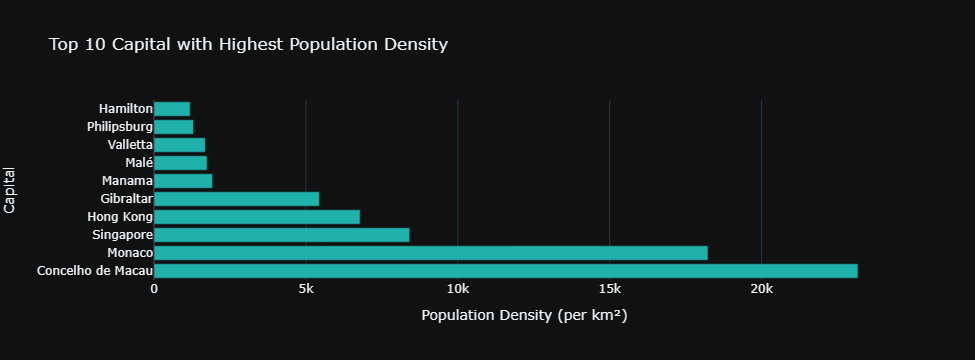

In [37]:
top_density_countries = countries.nlargest(10, 'Density (per km²)')
x = top_density_countries[['Capital', 'Density (per km²)']]
fig = px.bar(x, x='Density (per km²)', y='Capital',
             orientation='h',
             color_discrete_sequence = [colors[9]],
             title='Top 10 Capital with Highest Population Density',
             labels={'Density (per km²)': 'Population Density (per km²)'},
             template='plotly_dark')

fig.show()

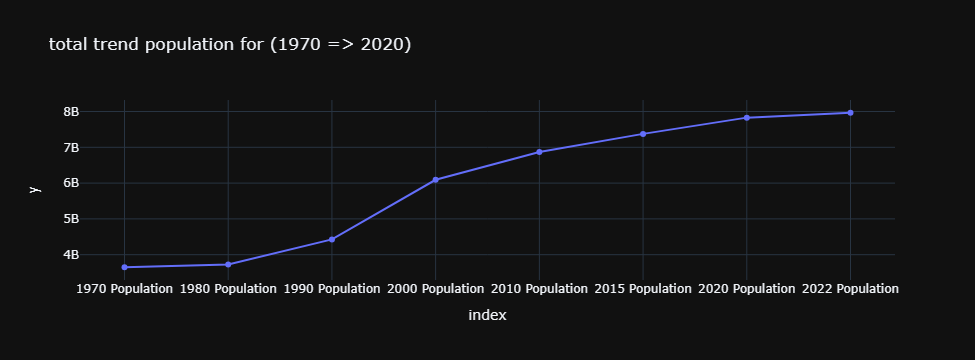

In [38]:
trend = countries.iloc[:,5:13].sum().sort_values(ascending=True)

fig = px.line(trend, x= trend.index, y= trend.values,
                  title='total trend population for (1970 => 2020)',
                  markers=True,
                  template='plotly_dark')

iplot(fig)